## Loan Prediction Model

### Introduction

The dataset involves data from a loan approval process where customers' demographic, financial, and employment details are recorded. The task is to predict whether a loan will be approved (Loan_Status)

### Objective

A financial institution wants to automate the loan approval process by developing a machine learning model that predicts whether a loan application will be approved. By analyzing past loan application data, the model will consider attributes like income, loan amount, education, employment, and credit history to classify applications as approved or rejected

## 2.1 Understanding the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

#relevant ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

#ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



In [2]:
# Upload train data
tr_df = pd.read_csv('train.csv')
tr_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Upload test data
te_df = pd.read_csv('test.csv', index_col =0)
te_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# Check the numerical data
list(set(tr_df.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [6]:
tr_df_numerical = tr_df.select_dtypes(include = ['float64', 'int64'])
tr_df_numerical.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [7]:
tr_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
#missing values in decsending order
tr_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Distribution of categorical variables
tr_df_categorical = tr_df.select_dtypes(include='object')


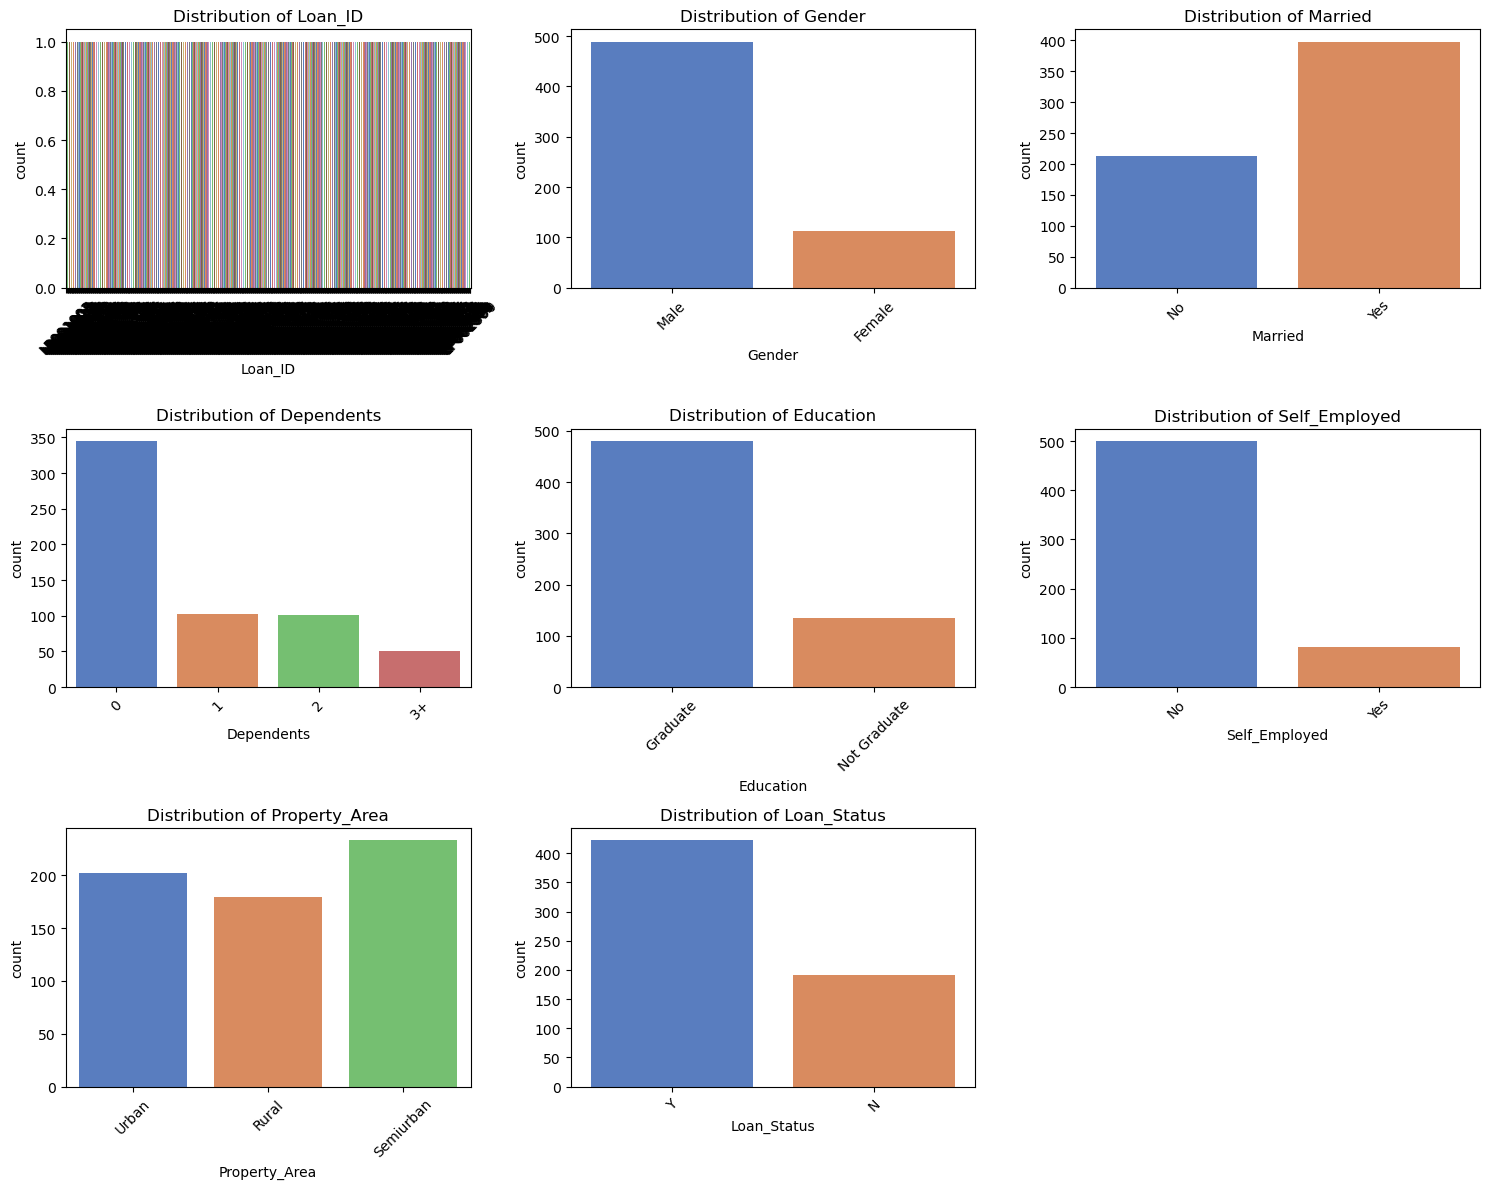

In [10]:
# Plot distribution of categorical variables
plt.figure(figsize=(15, 12))
for i, col in enumerate(tr_df_categorical, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=tr_df, palette="muted")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

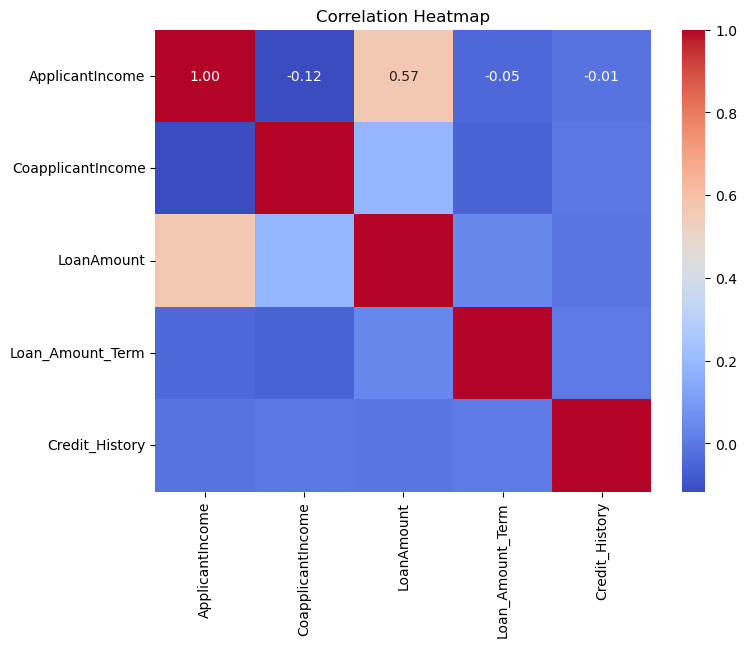

In [11]:
# Correlation Heatmap for numerical variables
plt.figure(figsize=(8, 6))
sns.heatmap(tr_df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

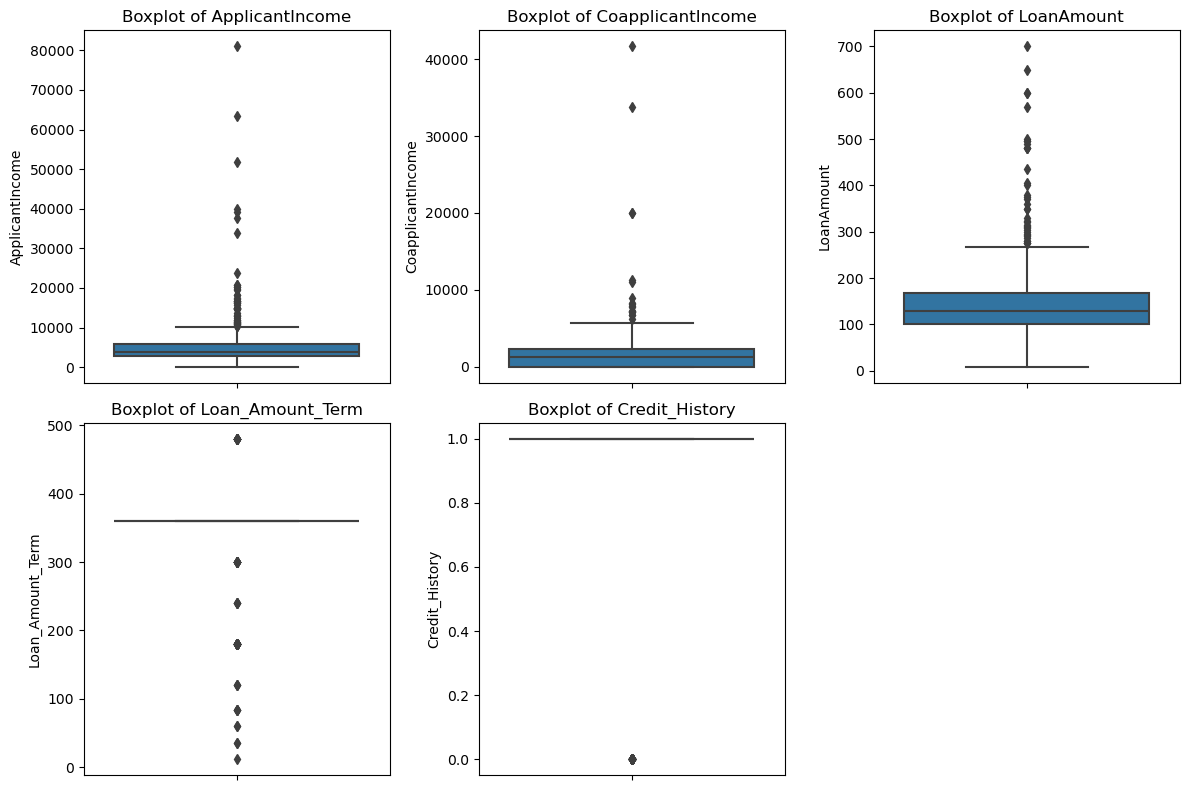

In [12]:
# Plot boxplots for all numerical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(tr_df_numerical, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=tr_df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

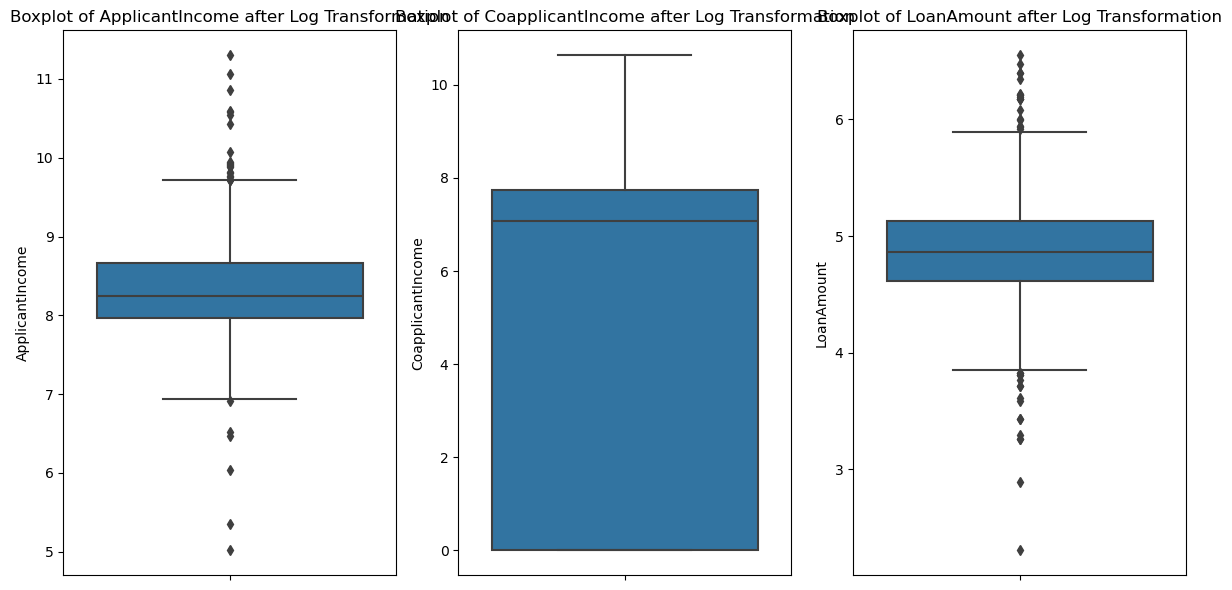

In [13]:
#Reduce skweness for the numerical columns using Log Transformation
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    tr_df[col] = np.log1p(tr_df[col])  # log1p handles zero values

# Verify the changes using a boxplot
plt.figure(figsize=(12, 6))
for i, col in enumerate(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=tr_df[col])
    plt.title(f'Boxplot of {col} after Log Transformation')
plt.tight_layout()
plt.show()

In [14]:
tr_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
# Handle categorical missing values with mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    tr_df[col].fillna(tr_df[col].mode()[0], inplace=True)

# Handle numerical missing values
tr_df['LoanAmount'].fillna(tr_df['LoanAmount'].median(), inplace=True)
tr_df['Loan_Amount_Term'].fillna(tr_df['Loan_Amount_Term'].median(), inplace=True)
tr_df['Credit_History'].fillna(tr_df['Credit_History'].mode()[0], inplace=True)

# Verify no missing values remain
print(tr_df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


#### Machine learning models

We will divide our dataset into two variables X as the features we defined earlier and y as the Loan_Status the target value we want to predict. Models we will use:
1. Logistic Regression
2. Decision Tree
3. Random Forest

The Process of Modeling the Data:
1. Importing the model
2. Fitting the model
3. Predicting Loan Status
4. Classification report by Loan Status
5. Overall accuracy

#### Logistic Regression

In [16]:
# Splitting the target variable and features
y = tr_df['Loan_Status']
X = tr_df.drop('Loan_Status', axis=1)

# 1. Handle Missing Values
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns.drop('Loan_ID')

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

X[num_cols] = num_imputer.fit_transform(X[num_cols])
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])



In [17]:
# Encode Categorical Variables
label_encoder = LabelEncoder()

for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History']:
    X[col] = label_encoder.fit_transform(X[col])

X = pd.get_dummies(X, columns=['Dependents', 'Property_Area'], drop_first=True)

# Drop Loan_ID
X = X.drop('Loan_ID', axis=1)

# Encode Target Variable BEFORE train-test split
y = label_encoder.fit_transform(y)


In [18]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
# Train Logistic Regression Model
LR = LogisticRegression(max_iter=200)
LR.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [20]:
# 5. Predictions and Evaluation
y_predict = LR.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))


Accuracy Score: 0.8216216216216217

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.41      0.56        51
           1       0.81      0.98      0.89       134

    accuracy                           0.82       185
   macro avg       0.84      0.69      0.72       185
weighted avg       0.83      0.82      0.80       185



Loan Approved (Class 1):
Precision = 0.83, implying 83% of predicted approvals were correct.
Recall = 0.91: The model captured 91% of all actual loan approvals.
F1-Score = 0.87: A strong balance of Precision and Recall.

Loan Rejected (Class 0):
Precision = 0.75: implying 75% of predicted rejections were correct.
Recall = 0.60: The model only captured 60% of actual loan rejections, indicating room for improvement.

Overall Accuracy:
The model is performing well but has slightly lower recall for predicting loan rejections.

#### Decision Tree

In [21]:
# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

In [22]:
# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [23]:
# Make predictions
y_pred_dt = dt_model.predict(X_test)

In [24]:
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7837837837837838

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.29      0.43        51
           1       0.78      0.97      0.87       134

    accuracy                           0.78       185
   macro avg       0.79      0.63      0.65       185
weighted avg       0.78      0.78      0.75       185



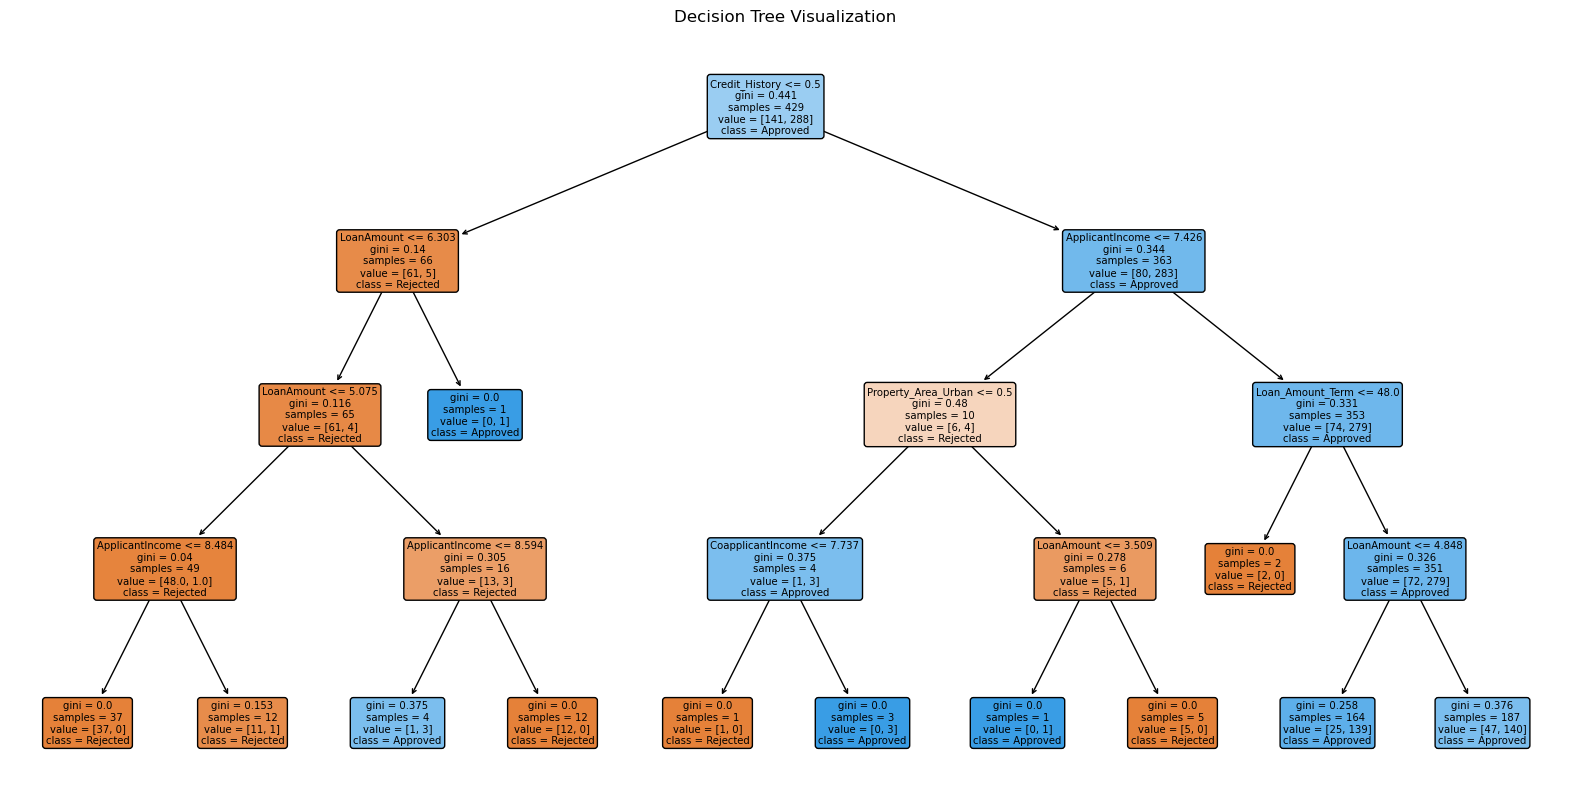

In [25]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, 
          feature_names=X_train.columns, 
          class_names=['Rejected', 'Approved'], 
          filled=True, 
          rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

Class 0 (Rejected Loans):
Precision (0.79): 79% of the predicted rejections are correct.
Recall (0.29): Only 29% of actual rejections are correctly identified.
F1-Score (0.43): Indicates a low balance between precision and recall for this class.

Class 1 (Approved Loans):
Precision (0.78): 78% of the predicted approvals are correct.
Recall (0.97): The model captures 97% of actual approvals, which is excellent.
F1-Score (0.87): A strong overall performance for this class

#### Random Forest

In [26]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=0, class_weight='balanced')

In [27]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, random_state=0)

In [28]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)

In [29]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.827027027027027

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.47      0.60        51
           1       0.83      0.96      0.89       134

    accuracy                           0.83       185
   macro avg       0.83      0.72      0.74       185
weighted avg       0.83      0.83      0.81       185



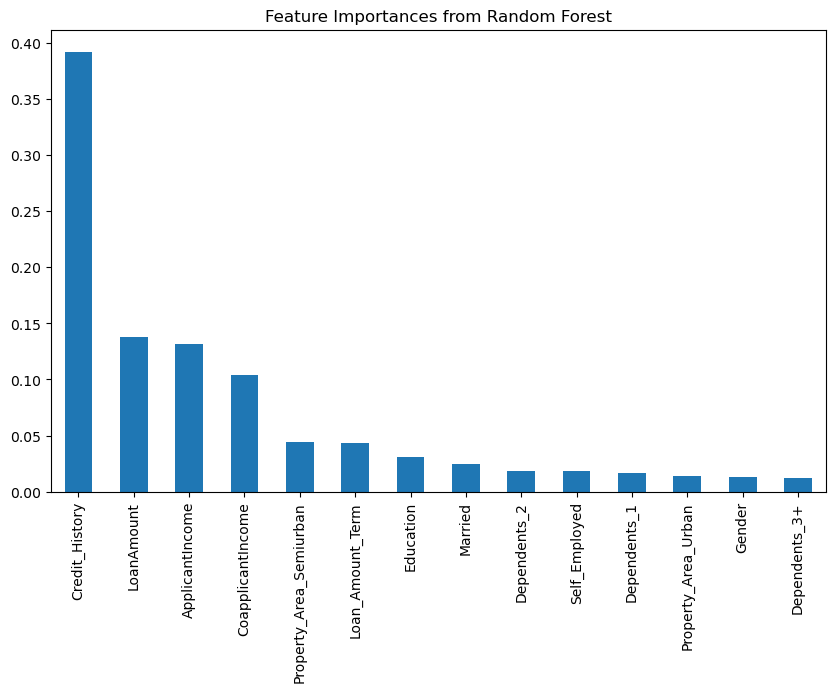

In [30]:
# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title("Feature Importances from Random Forest")
plt.show()


Class 0 (Rejected Loans):
Precision (0.83): 83% of the predicted loan rejections are correct.
Recall (0.47): Only 47% of actual rejections are correctly identified.
F1-Score (0.60): Reflects moderate performance, showing room for improvement in recall.

Class 1 (Approved Loans):
Precision (0.83): 83% of predicted approvals are correct.
Recall (0.96): The model captures 96% of actual approvals, which is excellent.

F1-Score (0.89): Demonstrates a very strong balance of precision and recall for this class.


##### Insights
Class 1 (Approved Loans):

The model performs exceptionally well, with high recall and F1-score.
This shows the model can confidently approve loans when the status is "Approved".

Class 0 (Rejected Loans):
The model struggles to identify rejected loans (low recall at 47%).
While precision is good, the low recall means many actual rejections are misclassified as approvals.
Improvements Over Decision Tree:

Accuracy improved from 78.3% to 82.7%.
Precision, recall, and F1-score for both classes improved slightly.

## Conclusion

In [31]:
score = [accuracy_score(y_test, y_predict),accuracy_dt,accuracy_rf]
Models = pd.DataFrame({
    'n_neighbors': ["Logistic Regression","Decision Tree","Random Forest",],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,n_neighbors,Score
2,Random Forest,0.827027
0,Logistic Regression,0.821622
1,Decision Tree,0.783784


The best model to use is the Random Forest

# Applying to the test data

In [32]:
# Example: Evaluate the final model on the test data
y_test_pred = dt_model.predict(X_test)

print("Final Model Performance on Test Data:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Final Model Performance on Test Data:
Accuracy: 0.7837837837837838

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.29      0.43        51
           1       0.78      0.97      0.87       134

    accuracy                           0.78       185
   macro avg       0.79      0.63      0.65       185
weighted avg       0.78      0.78      0.75       185



This indicates the model correctly predicts the loan status (approved/rejected) for 78.38% of the test data.

The model performs very well for approved loans (Class 1):
High recall (97%) means most approvals are correctly identified.

The model performs poorly for rejected loans (Class 0):
Low recall (29%) means many actual rejections are misclassified as approvals.

Class Imbalance:
The test data has 51 rejected loans and 134 approved loans, leading to the model being biased toward predicting "Approved."

# Overall Conclusion

We will need to address the class imbalance and explore new features or interactions between existing features to help the model identify rejected loans better.